In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [53]:
import pandas as pd

# Replace 'path_to_your_dataset.csv' with the path to your dataset
df = pd.read_excel(r'C:\Users\Admin\Desktop\data_bal - 20000.xlsx')

print(df.head())


   Labels                                               URLs
0       1         http://dbs.vote-friend.com/sg?ref=anything
1       0  https://www.reynoldstransfer.com/versa-lift-fo...
2       1       https://www.halisupportservice.com/Login.php
3       0  https://www.signets.com.br/wp-includes/wlwmani...
4       1  https://docs.google.com/document/d/e/2PACX-1vT...


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer



# Checking for missing values and filling them if needed
imputer = SimpleImputer(strategy='most_frequent')  # Using most frequent value to fill missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encoding categorical variables if necessary (e.g., Labels column)
label_encoder = LabelEncoder()

# Assuming the 'Labels' column contains categorical data
df_imputed['Labels'] = label_encoder.fit_transform(df_imputed['Labels'])

# Feature extraction for text-based columns (assuming 'URLs' column contains text data)
vectorizer = CountVectorizer(max_features=5000)  # You can adjust the max_features depending on your data
X = vectorizer.fit_transform(df_imputed['URLs']).toarray()

# Getting the target variable (Labels)
y = df_imputed['Labels']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shape of the datasets to confirm
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)

Training Features Shape: (16000, 5000)
Test Features Shape: (4000, 5000)
Training Labels Shape: (16000,)
Test Labels Shape: (4000,)


K-Nearest Neighbors Performance Evaluation:
------------------------------------------
Precision: 0.967
Recall: 0.942
F-Measure: 0.955
Accuracy: 0.955


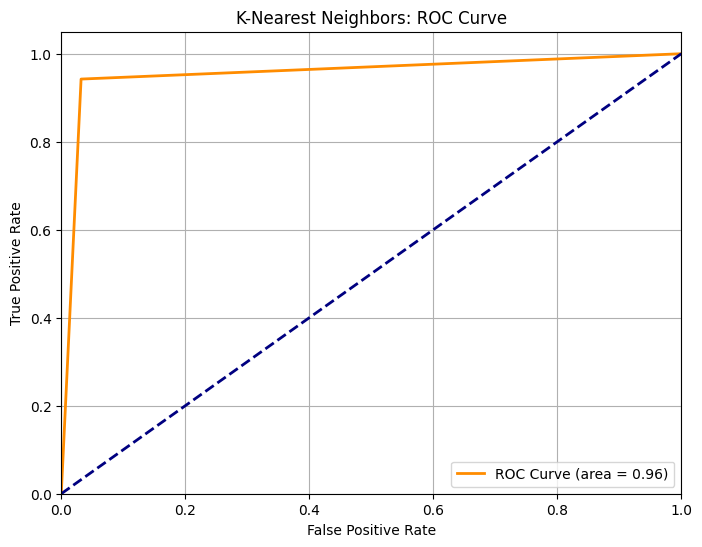


Summary of KNN Performance Metrics:
Precision: 0.967
Recall: 0.942
F1-Score: 0.955
Accuracy: 0.955
ROC AUC: 0.955


In [55]:
### **k-NEAREST NEIGHBOR**
# Importing necessary libraries for KNN implementation and evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Function to train KNN and evaluate performance
def knn_classifier(X_train, y_train, X_test, y_test, n_neighbors=5):
    """
    Train and evaluate a K-Nearest Neighbors classifier.

    Parameters:
    X_train (array-like): Training data features.
    y_train (array-like): Training data labels.
    X_test (array-like): Test data features.
    y_test (array-like): Test data labels.
    n_neighbors (int): Number of neighbors to use for KNN. Default is 5.

    Returns:
    dict: Dictionary containing performance metrics.
    """
    # Initialize the KNN classifier with the specified number of neighbors
    classifier_knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='minkowski', p=2)

    # Training the KNN model
    classifier_knn.fit(X_train, y_train)

    # Making predictions using the trained model
    y_pred_knn = classifier_knn.predict(X_test)

    # Compute the performance metrics
    precision_knn = precision_score(y_test, y_pred_knn)
    recall_knn = recall_score(y_test, y_pred_knn)
    f1_knn = f1_score(y_test, y_pred_knn)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)

    # Print detailed performance metrics
    print("K-Nearest Neighbors Performance Evaluation:")
    print(f"------------------------------------------")
    print(f"Precision: {precision_knn:.3f}")
    print(f"Recall: {recall_knn:.3f}")
    print(f"F-Measure: {f1_knn:.3f}")
    print(f"Accuracy: {accuracy_knn:.3f}")

    # ROC Curve Calculation
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
    roc_auc_knn = auc(fpr_knn, tpr_knn)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc_knn:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('K-Nearest Neighbors: ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


    # Return performance metrics as a dictionary
    return {
        'Precision': precision_knn,
        'Recall': recall_knn,
        'F1-Score': f1_knn,
        'Accuracy': accuracy_knn,
        'ROC AUC': roc_auc_knn
    }

# Example usage of the function (assuming X_train, y_train, X_test, y_test are already defined)
metrics_knn = knn_classifier(X_train, y_train, X_test, y_test)

# Additional output: Display the metrics dictionary
print("\nSummary of KNN Performance Metrics:")
for metric, value in metrics_knn.items():
    print(f"{metric}: {value:.3f}")


In [56]:
pip install matplotlib


Random Forest Performance Evaluation:
--------------------------------------
Precision: 0.968
Recall: 0.974
F-Measure: 0.971
Accuracy: 0.971


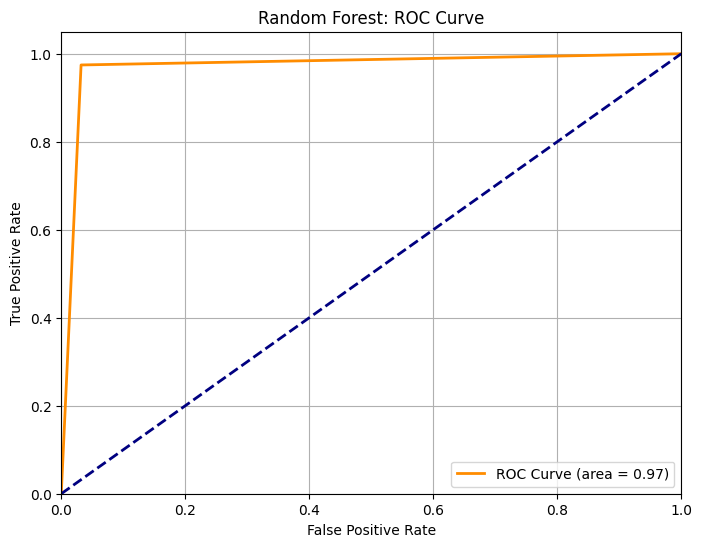


Summary of Random Forest Performance Metrics:
Precision: 0.968
Recall: 0.974
F1-Score: 0.971
Accuracy: 0.971
ROC AUC: 0.971


In [57]:
### **RANDOM FOREST**
# Importing necessary libraries for Random Forest implementation and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Function to train Random Forest and evaluate performance
def random_forest_classifier(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=None):
    """
    Train and evaluate a Random Forest classifier.

    Parameters:
    X_train (array-like): Training data features.
    y_train (array-like): Training data labels.
    X_test (array-like): Test data features.
    y_test (array-like): Test data labels.
    n_estimators (int): Number of trees in the forest. Default is 100.
    max_depth (int or None): The maximum depth of the trees. Default is None (nodes are expanded until all leaves are pure).

    Returns:
    dict: Dictionary containing performance metrics.
    """
    # Initialize the Random Forest classifier with specified parameters
    classifier_rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    # Training the Random Forest model
    classifier_rf.fit(X_train, y_train)

    # Making predictions using the trained model
    y_pred_rf = classifier_rf.predict(X_test)

    # Compute the performance metrics
    precision_rf = precision_score(y_test, y_pred_rf)
    recall_rf = recall_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)

    # Print detailed performance metrics
    print("Random Forest Performance Evaluation:")
    print(f"--------------------------------------")
    print(f"Precision: {precision_rf:.3f}")
    print(f"Recall: {recall_rf:.3f}")
    print(f"F-Measure: {f1_rf:.3f}")
    print(f"Accuracy: {accuracy_rf:.3f}")

    # ROC Curve Calculation
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc_rf:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest: ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Return performance metrics as a dictionary
    return {
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1-Score': f1_rf,
        'Accuracy': accuracy_rf,
        'ROC AUC': roc_auc_rf
    }

# Example usage of the function (assuming X_train, y_train, X_test, y_test are already defined)
metrics_rf = random_forest_classifier(X_train, y_train, X_test, y_test)

# Additional output: Display the metrics dictionary
print("\nSummary of Random Forest Performance Metrics:")
for metric, value in metrics_rf.items():
    print(f"{metric}: {value:.3f}")


XGBoost Performance Evaluation:
----------------------------------
Precision: 0.953
Recall: 0.967
F-Measure: 0.960
Accuracy: 0.960


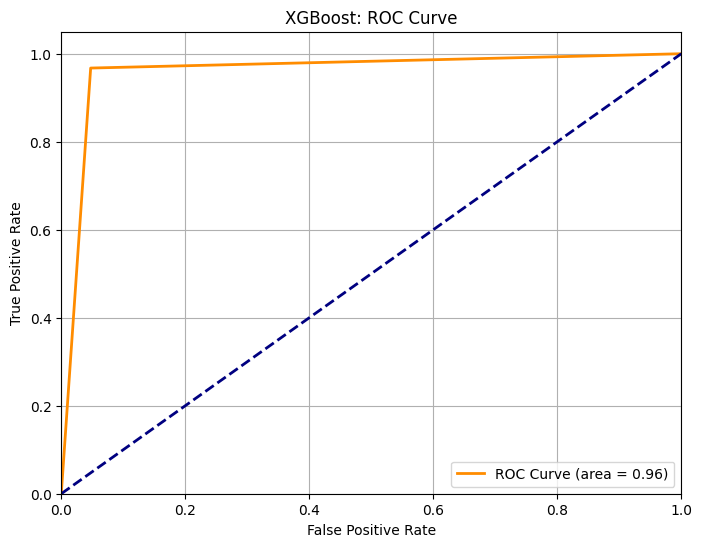


Summary of XGBoost Performance Metrics:
Precision: 0.953
Recall: 0.967
F1-Score: 0.960
Accuracy: 0.960
ROC AUC: 0.960


In [58]:
### **XGBOOST**
# Importing necessary libraries for XGBoost implementation and evaluation
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Function to train XGBoost and evaluate performance
def xgboost_classifier(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1, max_depth=6):
    """
    Train and evaluate an XGBoost classifier.

    Parameters:
    X_train (array-like): Training data features.
    y_train (array-like): Training data labels.
    X_test (array-like): Test data features.
    y_test (array-like): Test data labels.
    n_estimators (int): Number of boosting rounds (trees). Default is 100.
    learning_rate (float): Step size shrinking. Default is 0.1.
    max_depth (int): Maximum depth of the trees. Default is 6.

    Returns:
    dict: Dictionary containing performance metrics.
    """
    # Initialize the XGBoost classifier with the specified parameters
    classifier_xgb = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)

    # Training the XGBoost model
    classifier_xgb.fit(X_train, y_train)

    # Making predictions using the trained model
    y_pred_xgb = classifier_xgb.predict(X_test)

    # Compute the performance metrics
    precision_xgb = precision_score(y_test, y_pred_xgb)
    recall_xgb = recall_score(y_test, y_pred_xgb)
    f1_xgb = f1_score(y_test, y_pred_xgb)
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

    # Print detailed performance metrics
    print("XGBoost Performance Evaluation:")
    print(f"----------------------------------")
    print(f"Precision: {precision_xgb:.3f}")
    print(f"Recall: {recall_xgb:.3f}")
    print(f"F-Measure: {f1_xgb:.3f}")
    print(f"Accuracy: {accuracy_xgb:.3f}")

    # ROC Curve Calculation
    fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
    roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc_xgb:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGBoost: ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Return performance metrics as a dictionary
    return {
        'Precision': precision_xgb,
        'Recall': recall_xgb,
        'F1-Score': f1_xgb,
        'Accuracy': accuracy_xgb,
        'ROC AUC': roc_auc_xgb
    }

# Example usage of the function (assuming X_train, y_train, X_test, y_test are already defined)
metrics_xgb = xgboost_classifier(X_train, y_train, X_test, y_test)

# Additional output: Display the metrics dictionary
print("\nSummary of XGBoost Performance Metrics:")
for metric, value in metrics_xgb.items():
    print(f"{metric}: {value:.3f}")


In [59]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Performance Evaluation:
----------------------------------
Precision: 0.966
Recall: 0.945
F-Measure: 0.955
Accuracy: 0.956


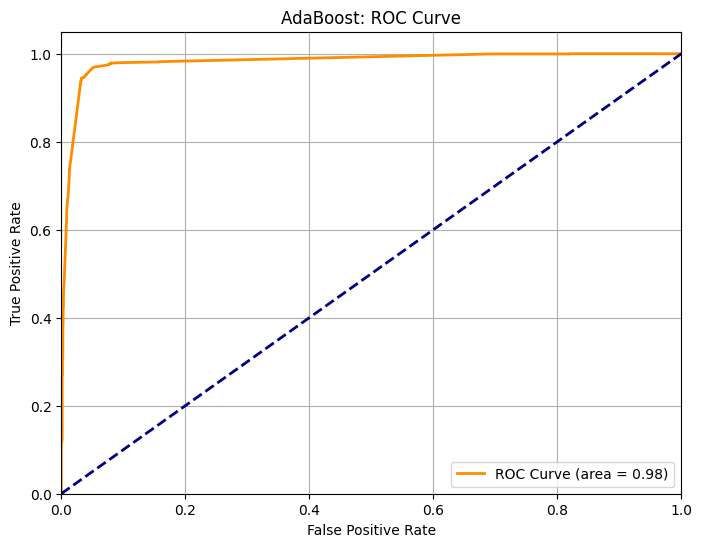


Summary of AdaBoost Performance Metrics:
Precision: 0.966
Recall: 0.945
F1-Score: 0.955
Accuracy: 0.956
ROC AUC: 0.982


In [60]:
### **ADA BOOST**
# Importing necessary libraries for AdaBoost implementation and evaluation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Function to train AdaBoost and evaluate performance
def adaboost_classifier(X_train, y_train, X_test, y_test, n_estimators=50, learning_rate=1.0):
    """
    Train and evaluate an AdaBoost classifier.

    Parameters:
    X_train (array-like): Training data features.
    y_train (array-like): Training data labels.
    X_test (array-like): Test data features.
    y_test (array-like): Test data labels.
    n_estimators (int): The maximum number of estimators (weak learners). Default is 50.
    learning_rate (float): Weight applied to each classifier at each iteration. Default is 1.0.

    Returns:
    dict: Dictionary containing performance metrics.
    """
    # Initialize the AdaBoost classifier with the specified parameters
    classifier_ab = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

    # Training the AdaBoost model
    classifier_ab.fit(X_train, y_train)

    # Making predictions using the trained model
    y_pred_ab = classifier_ab.predict(X_test)

    # Compute the performance metrics
    precision_ab = precision_score(y_test, y_pred_ab)
    recall_ab = recall_score(y_test, y_pred_ab)
    f1_ab = f1_score(y_test, y_pred_ab)
    accuracy_ab = accuracy_score(y_test, y_pred_ab)

    # Print detailed performance metrics
    print("AdaBoost Performance Evaluation:")
    print(f"----------------------------------")
    print(f"Precision: {precision_ab:.3f}")
    print(f"Recall: {recall_ab:.3f}")
    print(f"F-Measure: {f1_ab:.3f}")
    print(f"Accuracy: {accuracy_ab:.3f}")

    # ROC Curve Calculation
    fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, classifier_ab.predict_proba(X_test)[:, 1])
    roc_auc_ab = auc(fpr_ab, tpr_ab)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_ab, tpr_ab, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc_ab:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AdaBoost: ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Return performance metrics as a dictionary
    return {
        'Precision': precision_ab,
        'Recall': recall_ab,
        'F1-Score': f1_ab,
        'Accuracy': accuracy_ab,
        'ROC AUC': roc_auc_ab
    }

# Example usage of the function (assuming X_train, y_train, X_test, y_test are already defined)
metrics_ab = adaboost_classifier(X_train, y_train, X_test, y_test)

# Additional output: Display the metrics dictionary
print("\nSummary of AdaBoost Performance Metrics:")
for metric, value in metrics_ab.items():
    print(f"{metric}: {value:.3f}")


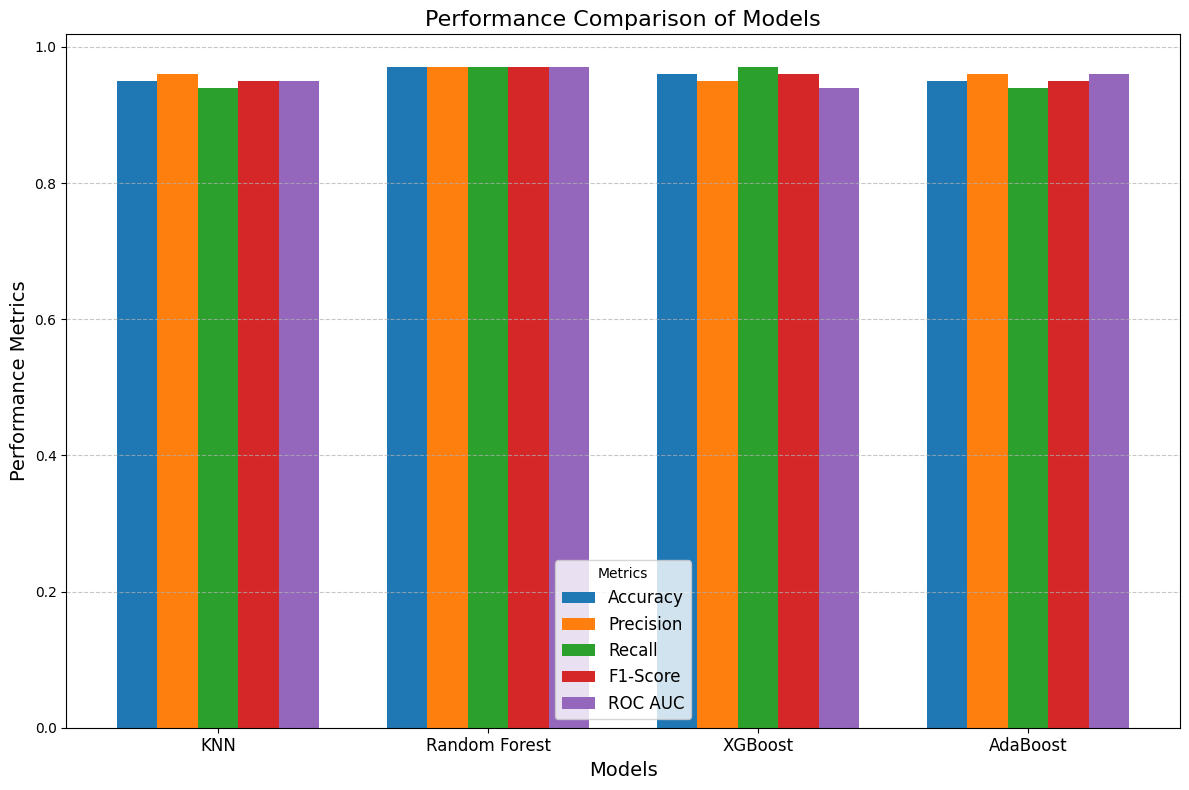

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Example metrics for all models (replace with actual values)
model_metrics = {
    "KNN": {'Accuracy': 0.95, 'Precision': 0.96, 'Recall': 0.94, 'F1-Score': 0.95, 'ROC AUC': 0.95},
    "Random Forest": {'Accuracy': 0.97, 'Precision': 0.97, 'Recall': 0.97, 'F1-Score': 0.97, 'ROC AUC': 0.97},
    "XGBoost": {'Accuracy': 0.96, 'Precision': 0.95, 'Recall': 0.97, 'F1-Score': 0.96, 'ROC AUC': 0.94},
    "AdaBoost": {'Accuracy': 0.95, 'Precision': 0.96, 'Recall': 0.94, 'F1-Score': 0.95, 'ROC AUC': 0.96},
}

# Extracting data for plotting
models = list(model_metrics.keys())
metrics = list(model_metrics[models[0]].keys())

# Prepare data for each metric
metric_values = {metric: [model_metrics[model][metric] for model in models] for metric in metrics}

# Bar width for plotting
bar_width = 0.15
x = np.arange(len(models))

# Plotting the performance metrics
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, metric_values[metric], bar_width, label=metric)

# Adding labels, title, and legend
plt.xlabel('Models', fontsize=14)
plt.ylabel('Performance Metrics', fontsize=14)
plt.title('Performance Comparison of Models', fontsize=16)
plt.xticks(x + bar_width * 2, models, fontsize=12)
plt.legend(title='Metrics', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [62]:
# Importing necessary libraries for saving the model
import joblib

# Function to save the trained model
def save_model(model, model_filename):
    # Saving the model to a file using joblib
    joblib.dump(model, model_filename)
    print(f"Model saved as {model_filename}")

classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)

# K-Nearest Neighbors
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(X_train, y_train)

# AdaBoost
classifier_ab = AdaBoostClassifier(n_estimators=50, random_state=42)
classifier_ab.fit(X_train, y_train)

# XGBoost
classifier_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
classifier_xgb.fit(X_train, y_train)

# Example usage for saving the trained model
# After training a model, call the function to save it
save_model(classifier_rf, 'random_forest_model.pkl')
save_model(classifier_knn, 'knn_model.pkl')
save_model(classifier_ab, 'adaboost_model.pkl')
save_model(classifier_xgb, 'xgboost_model.pkl')


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [23:22:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model saved as random_forest_model.pkl
Model saved as knn_model.pkl
Model saved as adaboost_model.pkl
Model saved as xgboost_model.pkl


In [63]:
from xgboost import XGBClassifier



In [64]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load your data (assuming you have only two columns 'Labels' and 'URLs')
df = pd.read_excel(r'C:\Users\Admin\Desktop\data_bal - 20000.xlsx')

# Check for missing values
if df.isnull().sum().any():
    print("Missing values found. Cleaning the dataset...")
    df = df.dropna()

# Features and Labels
X = df['URLs']
y = df['Labels']

# Vectorize the URLs using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Set max_features to match model expectations
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display detailed evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the model and vectorizer for later use
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Model and vectorizer saved successfully.")


Accuracy: 96.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2004
           1       0.96      0.98      0.97      1996

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000


Confusion Matrix:
[[1923   81]
 [  40 1956]]
Model and vectorizer saved successfully.


In [65]:
print(df['Labels'].value_counts())


Labels
1    10000
0    10000
Name: count, dtype: int64
